# About dataset:
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In [1]:
#To ignore the warinings we import this module
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [3]:
train=pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#droping out unecessary column:
train=train.drop(["Name","PassengerId"],axis=1)

In [5]:
#Renaming the columns:
train.rename(columns={'SibSp':'Sibling','Pclass':'Class'},inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Class     891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Sibling   891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
#Count types of data type
train.dtypes.value_counts()

int64      4
object     4
float64    2
dtype: int64

In [8]:
#To check the number of rows and columns in dataset
train.shape

(891, 10)

In [9]:
#Show the names of columns
train.columns

Index(['Survived', 'Class', 'Sex', 'Age', 'Sibling', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#Show range of index
train.index

RangeIndex(start=0, stop=891, step=1)

Survived      0
Class         0
Sex           0
Age         177
Sibling       0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


<AxesSubplot:>

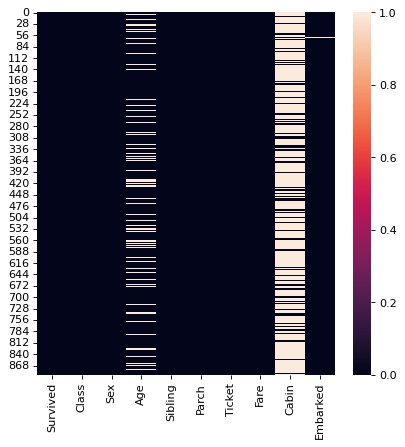

In [11]:
#To check null values in dataset
print(train.isna().sum())
plt.figure(figsize=(6,6),dpi=80)
sns.heatmap(train.isnull())

The heatmap indicates that there are null values in column age and cabin.

In [12]:
#Total null values present in dataset
train.isna().sum().sum()

866

In [13]:
#To check the duplicates in dataset
train.duplicated().sum()

15

In [14]:
train.describe()

,Survived,Class,Age,Sibling,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


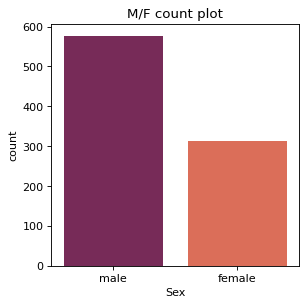

In [15]:
plt.figure(figsize=(4,4),dpi=80)
plt.title('M/F count plot')
sns.countplot(x='Sex',palette='rocket',data=train)
plt.show()

The graph shows that male population is more than female on ship.

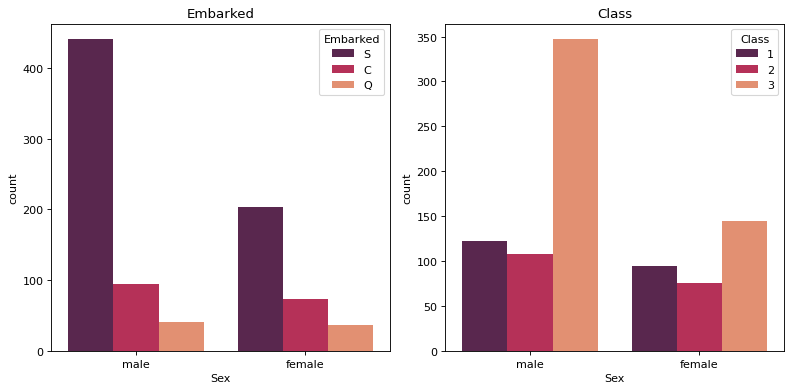

In [16]:
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(1,2,1)
plt.title('Embarked')
sns.countplot(x='Sex',palette='rocket',data=train,hue='Embarked')

plt.subplot(1,2,2)
plt.title('Class')
sns.countplot(x='Sex',palette='rocket',data=train,hue='Class')

plt.tight_layout()
plt.show()

* In Embarked graph male and female'S'category highest population and lowest is 'Q' category
* In Class graph male and female calss 3 is higher

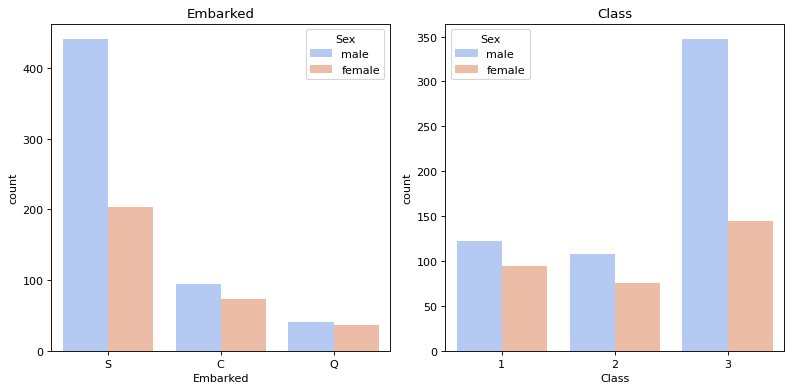

In [17]:
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(1,2,1)
plt.title('Embarked')
sns.countplot(x='Embarked',palette='coolwarm',data=train,hue='Sex')

plt.subplot(1,2,2)
plt.title('Class')
sns.countplot(x='Class',palette='coolwarm',data=train,hue='Sex')

plt.tight_layout()
plt.show()

In [18]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
    
train['Person']=train[['Age','Sex']].apply(male_female_child,axis=1)
print(train.columns)

Index(['Survived', 'Class', 'Sex', 'Age', 'Sibling', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Person'],
      dtype='object')


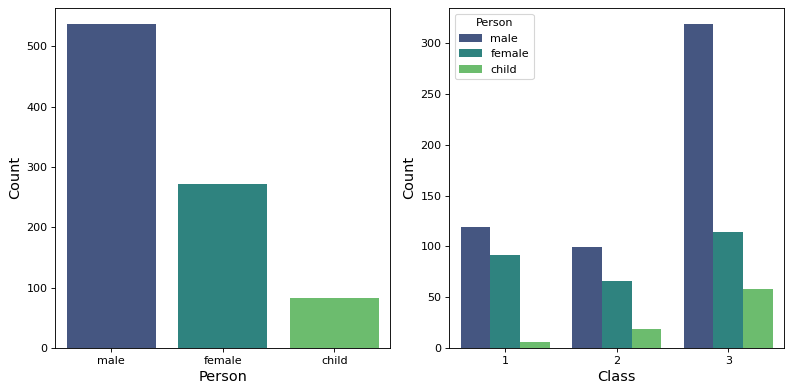

In [19]:
plt.figure(figsize=(10,5),dpi=80)
ax=plt.subplot(1,2,1)
sns.countplot(x='Person',data=train,palette='viridis')
ax.set_xlabel('Person', fontsize=13)
ax.set_ylabel('Count', fontsize=13)

ax=plt.subplot(1,2,2)
sns.countplot(x='Class',hue='Person',data=train,palette='viridis')
ax.set_xlabel('Class', fontsize=13)
ax.set_ylabel('Count', fontsize=13)

plt.tight_layout()
plt.show()

The graph shows that male > children

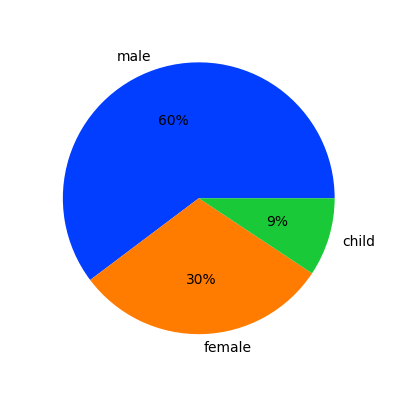

In [20]:
#visualizing the person count
a=train['Person'].value_counts()
plt.figure(figsize=(5,5),dpi=100)
palette_color=sns.color_palette('bright')
plt.pie(a, colors=palette_color,labels=a.index,radius=0.9,autopct='%.0f%%')
plt.show()

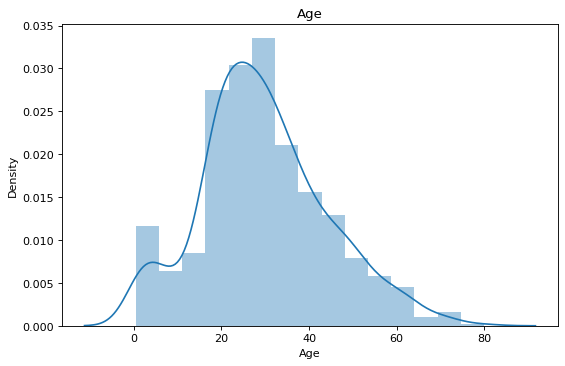

In [21]:
#Visualizing the age column
plt.figure(figsize=(8,5),dpi=80)
plt.title('Age')
sns.distplot(train['Age'],bins = 15)
plt.show()

Graph indicates that people traveling on ship are of age 20-30

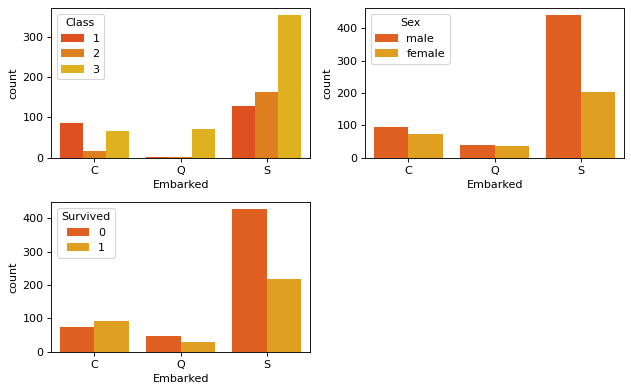

In [22]:
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(2,2,1)
sns.countplot(x='Embarked',data=train,hue='Class',order=['C','Q','S'],palette='autumn')

plt.subplot(2,2,2)
sns.countplot(x='Embarked',data=train,hue='Sex',order=['C','Q','S'],palette='autumn')

plt.subplot(2,2,3)
sns.countplot(x='Embarked',data=train,hue='Survived',order=['C','Q','S'],palette='autumn')

plt.tight_layout()
plt.show()

**Graph1:**
* From 'S' there are higher number of class 1 people on ship.
* From 'Q' there are smaller number op passengers traveling from all the classes.
* Class 3 passengers belonging from 'S' are higher amount of passenger travelling on ship.

**Graph2:**
* Male and female both belonging from 'S' are more in number.

**Graph3:**
* 0->not survived
* 1->survived
* More amount of people survived from 'S' and viceversa from 'Q'.



In [23]:
#Passenger travelling alone/with family
train['Alone']=train['Sibling'] + train['Parch']
def alones(values):
    if values == 0:
        return('alone')
    else:
        return('with family')
    
train['Alone']=train['Alone'].apply(alones)

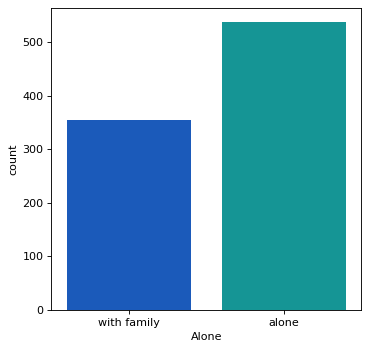

In [24]:
plt.figure(figsize=(5,5),dpi=80)
sns.countplot(x='Alone',data=train,palette='winter')
plt.show()

Passengers travelling alone are 500 whereas travelling with family are about 380

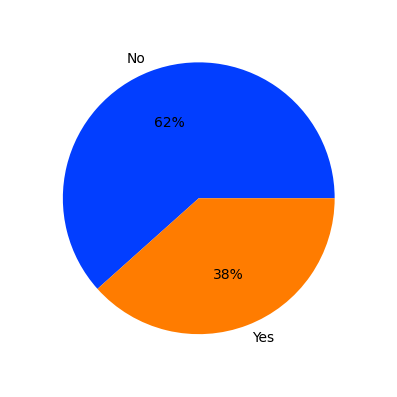

In [25]:
#Passengers survived or not
plt.figure(figsize=(5,5),dpi=100)
train['Survivior']=train['Survived'].map({0:'No',1:'Yes'})
b=train['Survivior'].value_counts()
plt.pie(b, colors=palette_color,labels=b.index,radius=0.9,autopct='%.0f%%')
plt.show()

Most of the passengers travelling on the ship didn't survived about 38% of total passenger are able survived.

<Figure size 400x400 with 0 Axes>

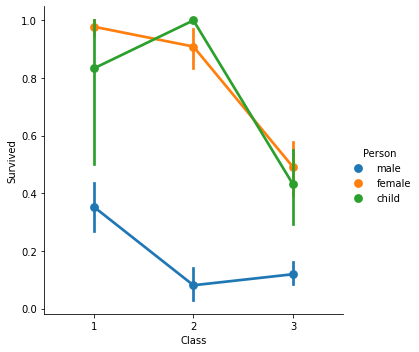

In [26]:
#Survival of passenger gender wise
plt.figure(figsize=(5,5),dpi=80)
sns.factorplot(x='Class',y='Survived',data=train,hue='Person')
plt.show()

Male are definately not from survival because from any of classes dramatically decreases the chances of survival.

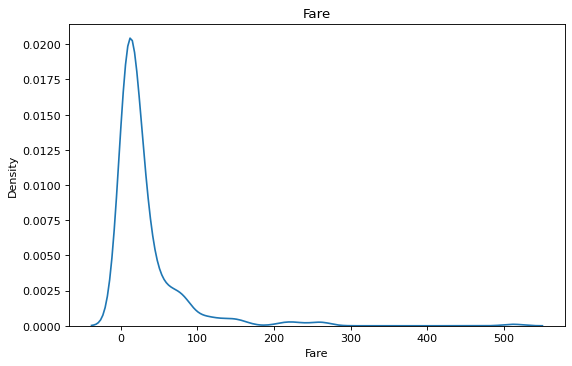

In [27]:
#Visualizing the fare column
plt.figure(figsize=(8,5),dpi=80)
plt.title('Fare')
sns.kdeplot(train['Fare'])
plt.show()

Ticket fare for passengers travelling costs upto 500 and maximum ticket fare purchased by the passengers ranges upto 5-50 .

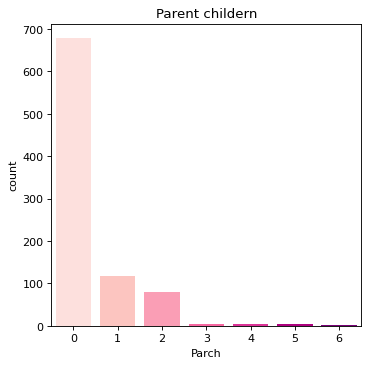

In [28]:
#Count of passenger having parent or children
plt.figure(figsize=(5,5),dpi=80)
sns.countplot(x='Parch',data=train,palette='RdPu',saturation=1)
plt.title('Parent childern')
plt.show()

Maximum passengers do not have any parent and children but those passengers have parent childer are greater in range between 1-2 and and goes upto 6.

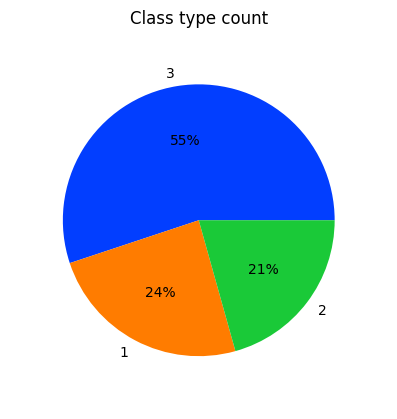

In [29]:
#Passengers survived or not
plt.figure(figsize=(5,5),dpi=100)
c=train['Class'].value_counts()
plt.title('Class type count')
plt.pie(c, colors=palette_color,labels=c.index,radius=0.9,autopct='%.0f%%')
plt.show()

Passenger travelling on ship maximum belong from 3rd class and their count is 55% whereas as passengers travelling from 1st class with count of 24% of total passengers.

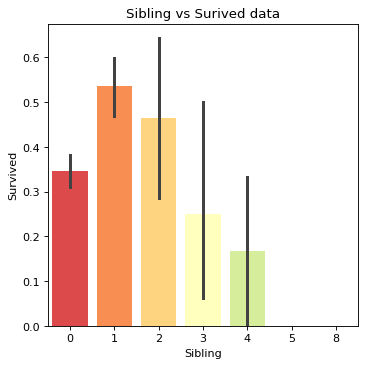

In [30]:
plt.figure(figsize=(5,5),dpi=80)
plt.title('Sibling vs Surived data')
sns.barplot(x='Sibling',y='Survived',data=train,palette='Spectral',saturation=1)
plt.show()

According to graph passengers whoes having 1 sibling have survived.

# **Thankyou....**